In [4]:
%matplotlib inline

from numpy import *
import matplotlib.pyplot as plt

### Rode o mesmo programa nos dados contendo anos de escolaridade (primeira coluna) versus salário (segunda coluna). Esse exemplo foi trabalhado em sala de aula em várias ocasiões. Os itens a seguir devem ser respondidos usando esses dados.

In [26]:
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[0, 1]
        totalError += (y - (m * x + b)) **2
    return totalError/float(len(points))

def step_gradient(current_b , current_m, points, learningRate):
    #gradient descent
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((current_m * x) + current_b))
        m_gradient += -(2/N) * x * (y - ((current_m * x) + current_b))
    new_b = current_b - (learningRate * b_gradient)
    new_m = current_m - (learningRate * m_gradient)
    return [new_b, new_m]
 
def gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations):
    b = initial_b
    m = initial_m
    x, y = [], []
    
    for i in range(num_iterations):
        b, m = step_gradient(b , m, array(points), learning_rate)
        rss = compute_errors(b, m, points)
    return [b, m]

def run(gradient_function):
    points = genfromtxt("./data/income.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = 1000
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_function(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    
run(gradient_descent_runner)

Starting gradient descent at b = 0, m = 0, error = 710.6936852813855
Running...
After 1000 iterations b = -0.18234255376510086, m = 3.262182267596014, error = 779.3340688681667


### 2 - Modifique o código original para imprimir o RSS a cada iteração do gradiente descendente. Gere um plot mostrando o RSS por interação.

Starting gradient descent at b = 0, m = 0, error = 710.6936852813855
Running...
RSS = 569.2857242729146
RSS = 450.73922168428186
RSS = 352.22132599871213
RSS = 271.21996767408876
RSS = 205.50891789110707
RSS = 153.11658409329166
RSS = 112.29814628656816
RSS = 81.51067984767897
RSS = 59.39094797455454
RSS = 44.73558036012786
RSS = 36.48338459779134
RSS = 33.69956360202756
RSS = 35.561636283092305
RSS = 41.346880146548536
RSS = 50.42113366234327
RSS = 62.22881340149526
RSS = 76.28401628386628
RSS = 92.16259100813066
RSS = 109.4950750151538
RSS = 127.96040432086696
RSS = 147.28031338069056
RSS = 167.21435093659804
RSS = 187.55544565918942
RSS = 208.1259624283227
RSS = 228.7741963843714
RSS = 249.37125750622403
RSS = 269.80830350173636
RSS = 289.99408329410414
RSS = 309.85275740959366
RSS = 329.3219651684007
RSS = 348.3511117959663
RSS = 366.8998514470247
RSS = 384.93674470491567
RSS = 402.4380714163935
RSS = 419.3867817761003
RSS = 435.77157041073156
RSS = 451.58605985377926
RSS = 466.828

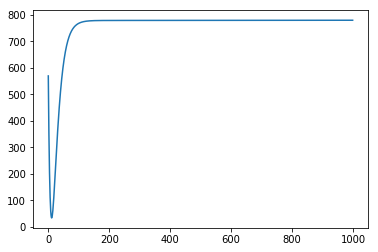

In [27]:
def gradient_descent_runner_plot(points, initial_b, initial_m, learning_rate, num_iterations):
    b = initial_b
    m = initial_m
    x, y = [], []
    
    for i in range(num_iterations):
        b, m = step_gradient(b , m, array(points), learning_rate)
        rss = compute_errors(b, m, points)
        print("RSS = {0}".format(rss))
        x.append(i)
        y.append(rss)
        
    plt.plot(x, y)
    return [b, m]
    
run(gradient_descent_runner_plot)